# Principal Component Analysis - Heart attack

Github Link : 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [27]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
heartattack_reason = data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
heartattack_result = data[['target']]

heartattack_reason = np.array(heartattack_reason)
heartattack_reason = heartattack_reason.astype(float)

heartattack_result = np.array(heartattack_result)

In [34]:
mu = np.mean(heartattack_reason.T, axis = 1)
np.set_printoptions(suppress=True)
print(mu)

[ 54.36633663   0.68316832   0.9669967  131.62376238 246.2640264
   0.14851485   0.52805281 149.64686469   0.32673267   1.03960396
   1.39933993   0.72937294   2.31353135]


In [35]:
x = []
for i in heartattack_reason:
    x.append(i-mu)
arrX = np.asarray(x)

In [37]:
print(arrX.shape)
tran_X = arrX.transpose()
print(tran_X.shape)

(303, 13)
(13, 303)


In [38]:
S = np.matmul(tran_X,arrX)

In [40]:
eig_val_cov, eig_vec_cov = np.linalg.eig(S)

In [41]:
print(eig_val_cov)

[814151.31352961 163764.01237762  92132.06590172  17660.35002518
    418.29697425    306.28435315    249.39030455    108.72516245
     34.2091799      84.09195272     44.61707832     54.77246551
     63.97234518]


Here 1st 4 features have highest impact they are : 
1. Age
2. Sex
3. CP - Chest Pain
4. trestbps - resting blood pressure

In [44]:
Q = eig_vec_cov[:,:4]
Q.shape

(13, 4)

In [45]:
a=[]
for i in range(303):
    a.append(np.matmul(Q.T,arrX[i]))
    
A = np.array(a)

In [47]:
result = np.append(A,heartattack_result,axis=1)

Here we complete PCA so we use logistic regression 

Below is result of logitic regression before using PCA 

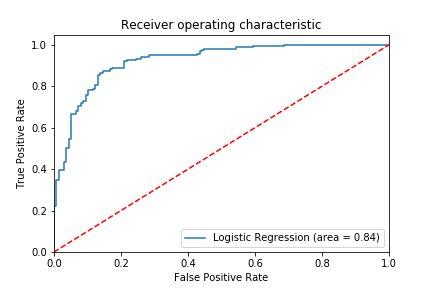

In [56]:
X = result[:,:-1]
y = result[:,4:]

In [57]:
# implimenting logistic regression

logreg = LogisticRegression()
logreg.fit(X, y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.71


In [59]:
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[ 88  50]
 [ 37 128]]


In [60]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67       138
         1.0       0.72      0.78      0.75       165

    accuracy                           0.71       303
   macro avg       0.71      0.71      0.71       303
weighted avg       0.71      0.71      0.71       303



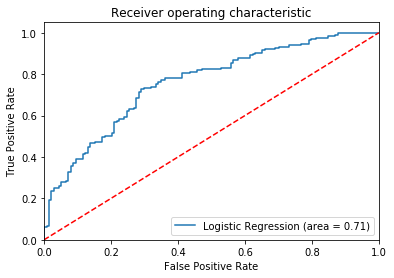

In [61]:
logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()